# Implementing Singular Value Decomposition from scratch

## Ipshita Ghosh
## 20122006

In [5]:
#importing necessary packages

#for numerical analysis
import numpy as np    

#to perform scientific calculations
import scipy  

#for plotting
import matplotlib.pyplot as plt

#for jaccard distances
from sklearn.metrics import pairwise_distances  

#for multidimensional
from sklearn import manifold 

#warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#creating dataset

foods_binary = np.random.randint(2, size=(100, 10))
print(foods_binary.shape)

(100, 10)


**Jaccards similarity**:

Jaccard Similarity Index is a measure of the similarity between two sets of data. It ranges from 0 to 1. The closer to 1, the more similar the two sets of data.

The Jaccard similarity index is calculated as:

### $\frac{(number\ of\ observations\ in\ both\ sets)}{(number\ in\ either\ set)}$

Or

### $J(A, B) = \frac{|A∩B|}{|A∪B|}$

In [6]:
#initializing the distance matrix using Jaccards dissimalirity

dis_matrix = pairwise_distances(f`oods_binary, metric = 'jaccard')  
print(dis_matrix.shape)

(100, 100)


In [7]:
#multidimensional scaling algorithm

mds_model = manifold.MDS(n_components = 2,  #number of components
                         random_state = 123,  #reproducible
                         dissimilarity = 'precomputed')  #type

#fitting
mds_fit = mds_model.fit(dis_matrix) 

#assigning
mds_coords = mds_model.fit_transform(dis_matrix)                                                                                                                                

**Plotting the results**

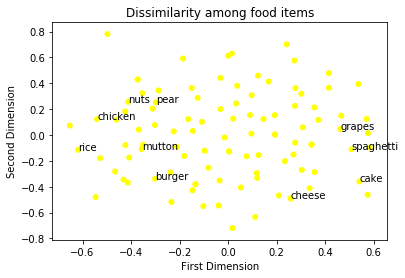

In [10]:
#the array
food_names = ['spaghetti', 'rice', 'chicken', 'burger', 'cheese', 'grapes', 'pear', 'cake', 'nuts', 'mutton']

#initialize graph
plt.figure()  

#add coordinates
plt.scatter(mds_coords[:,0],
            mds_coords[:,1],  
            facecolors = 'yellow', 
            edgecolors = 'none')  # points in white (invisible)  


#adding labels
labels = food_names  

#looping through
for label, x, y in zip(labels, mds_coords[:,0], 
                       mds_coords[:,1]):  
    #plot
    plt.annotate(label, (x,y), xycoords = 'data')  

#adding labels    
plt.xlabel('First Dimension')  
plt.ylabel('Second Dimension')  
plt.title('Dissimilarity among food items')      
plt.show()